In [1]:
import pandas as pd
import numpy as np

In [2]:
yahoo = pd.read_csv(r"C:\Users\saden\OneDrive\Documents\텐서프\yahoo_1.csv" )
yahoo.columns = ['traffic']
yahoo

,traffic
0,0.161966
1,0.197441
2,0.137626
3,0.159675
4,0.175381
...,...
1414,0.176358
1415,0.226219
1416,0.172297
1417,0.091758


In [30]:
yahoo.describe()

,traffic
count,1419.000000
mean,0.082725
std,0.070158
min,0.000000
25%,0.038740
50%,0.070439
75%,0.107565
max,0.787127


In [31]:
yahoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   traffic  1419 non-null   float64
dtypes: float64(1)
memory usage: 11.2 KB


In [32]:
yahoo['traffic'].isna().sum()
(yahoo['traffic'] == 0).sum()

143

keep zero

In [16]:
yahoo1 = pd.read_csv(r"C:\Users\saden\OneDrive\Documents\텐서프\yahoo_1.csv" )
yahoo1.columns = ['traffic']

In [17]:
long = 60
mid = 30
short = 5

#1 minute rolling
yahoo1['mean_l'] = yahoo1['traffic'].rolling(window=60).mean()
yahoo1['std_l'] = yahoo1['traffic'].rolling(window=60).std()

#1 hour rolling
yahoo1['mean_m'] = yahoo1['traffic'].rolling(window=30).mean()
yahoo1['std_m'] = yahoo1['traffic'].rolling(window=30).std()
#1 day rolling
yahoo1['mean_s'] = yahoo1['traffic'].rolling(window=5).mean()
yahoo1['std_s'] = yahoo1['traffic'].rolling(window=5).std()

features1 = yahoo1[['mean_l','std_l','mean_m','std_m','mean_s','std_s']].dropna()

In [45]:
yahoo1

,traffic,mean_l,std_l,mean_m,std_m,mean_s,std_s
0,0.161966,NaN,NaN,NaN,NaN,NaN,NaN
1,0.197441,NaN,NaN,NaN,NaN,NaN,NaN
2,0.137626,NaN,NaN,NaN,NaN,NaN,NaN
3,0.159675,NaN,NaN,NaN,NaN,NaN,NaN
4,0.175381,NaN,NaN,NaN,NaN,0.166418,0.022006
...,...,...,...,...,...,...,...
1414,0.176358,0.079934,0.040250,0.082543,0.043025,0.110638,0.043869
1415,0.226219,0.082825,0.044292,0.089529,0.048608,0.129221,0.068587
1416,0.172297,0.084554,0.045727,0.092121,0.050903,0.149995,0.060865
1417,0.091758,0.085169,0.045569,0.092139,0.050903,0.151425,0.059001


zero as missing value

In [3]:
yahoo2 = pd.read_csv(r"C:\Users\saden\OneDrive\Documents\텐서프\yahoo_1.csv" )
yahoo2.columns = ['traffic']

In [4]:
yahoo2['traffic'] = yahoo2['traffic'].replace(0, np.nan)
yahoo2['traffic'] = yahoo2['traffic'].ffill()


In [7]:
long = 60
mid = 30
short = 5

#1 minute rolling
yahoo2['mean_l'] = yahoo2['traffic'].rolling(window=60).mean()
yahoo2['std_l'] = yahoo2['traffic'].rolling(window=60).std()

#1 hour rolling
yahoo2['mean_m'] = yahoo2['traffic'].rolling(window=30).mean()
yahoo2['std_m'] = yahoo2['traffic'].rolling(window=30).std()

#1 day rolling
yahoo2['mean_s'] = yahoo2['traffic'].rolling(window=5).mean()
yahoo2['std_s'] = yahoo2['traffic'].rolling(window=5).std()
features2 = yahoo2[['mean_l','std_l','mean_m','std_m','mean_s','std_s']].dropna()


In [43]:
yahoo2

,traffic,mean_l,std_l,mean_m,std_m,mean_s,std_s
0,0.161966,NaN,NaN,NaN,NaN,NaN,NaN
1,0.197441,NaN,NaN,NaN,NaN,NaN,NaN
2,0.137626,NaN,NaN,NaN,NaN,NaN,NaN
3,0.159675,NaN,NaN,NaN,NaN,NaN,NaN
4,0.175381,NaN,NaN,NaN,NaN,0.166418,0.022006
...,...,...,...,...,...,...,...
1414,0.176358,0.080998,0.038478,0.083579,0.041310,0.110638,0.043869
1415,0.226219,0.083888,0.042615,0.090565,0.046937,0.129221,0.068587
1416,0.172297,0.085618,0.044062,0.093157,0.049254,0.149995,0.060865
1417,0.091758,0.086232,0.043883,0.093174,0.049253,0.151425,0.059001


In [8]:
#scalling version 1

from sklearn.preprocessing import StandardScaler
"""
pair_5 = features1[['mean_s','std_s']]
pair_30 = features1[['mean_m','std_m']]
pair_60 = features1[['mean_l','std_l']]
"""


#scalling version 2
pair_5 = features2[['mean_s','std_s']]
pair_30 = features2[['mean_m','std_m']]
pair_60 = features2[['mean_l','std_l']]

ss = StandardScaler()
five = ss.fit_transform(pair_5)
thirty = ss.fit_transform(pair_30)
sixty = ss.fit_transform(pair_60)

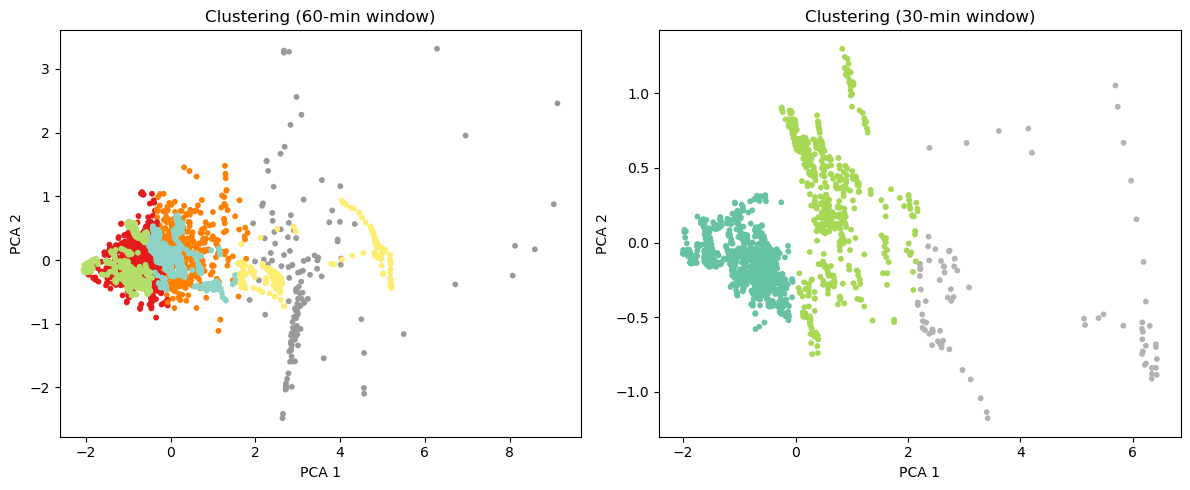

In [9]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def cluster_and_plot(data, label, cmap):

    #KMeans clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    labels = kmeans.fit_predict(data)

    #PCA for visualization
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(data)

    #plot
    plt.scatter(reduced[:,0], reduced[:,1], c=labels, cmap=cmap, s=10)
    plt.title(f"Clustering ({label})")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
cluster_and_plot(five, "5-min window", 'Set1')

plt.subplot(1,3,2)
cluster_and_plot(thirty, "30-min window", 'Set2')

plt.subplot(1,3,1)
cluster_and_plot(sixty, "60-min window", 'Set3')

plt.tight_layout()
plt.show()

In [18]:
"""feat_30 = yahoo2[['mean_m','std_m']].dropna()"""
feat_30 = yahoo1[['mean_m','std_m']].dropna()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_30 = scaler.fit_transform(feat_30)

# Fit KMeans again if needed
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled_30)

# Inverse transform cluster centers back to original scale
original_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Print cluster centers
for i, (mean_val, std_val) in enumerate(original_centers):
    print(f"Cluster {i}: mean traffic = {mean_val:.4f}, std = {std_val:.4f}")

Cluster 0: mean traffic = 0.0665, std = 0.0412
Cluster 1: mean traffic = 0.0904, std = 0.0738
Cluster 2: mean traffic = 0.1555, std = 0.1208


In [19]:
"""feat_60 = yahoo2[['mean_l','std_l']].dropna()"""
feat_60 = yahoo1[['mean_l','std_l']].dropna()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_60 = scaler.fit_transform(feat_60)

# Fit KMeans again if needed
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled_60)

# Inverse transform cluster centers back to original scale
original_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Print cluster centers
for i, (mean_val, std_val) in enumerate(original_centers):
    print(f"Cluster {i}: mean traffic = {mean_val:.4f}, std = {std_val:.4f}")

Cluster 0: mean traffic = 0.0718, std = 0.0535
Cluster 1: mean traffic = 0.1626, std = 0.1345
Cluster 2: mean traffic = 0.1170, std = 0.0880
